In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [4]:
vege_price_df = pd.read_csv(('./food_price.csv'))
vege_price_df.head()

,REF_DATE,GEO,DGUID,Commodity groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,77.4,NaN,NaN,NaN,1
1,2007-02,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,78.3,NaN,NaN,NaN,1
2,2007-03,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,80.6,NaN,NaN,NaN,1
3,2007-04,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,79.0,NaN,NaN,NaN,1
4,2007-05,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,78.6,NaN,NaN,NaN,1


In [5]:
features_df = pd.read_csv('./consumer_price_index_all_items.csv')
features_df.head()


,REF_DATE,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,109.4,NaN,NaN,NaN,1
1,2007-02,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,110.2,NaN,NaN,NaN,1
2,2007-03,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,111.1,NaN,NaN,NaN,1
3,2007-04,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,111.6,NaN,NaN,NaN,1
4,2007-05,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,112.1,NaN,NaN,NaN,1


In [ ]:
# Extract prices of various products by year.
display(features_df["Products and product groups"].unique())

energy_price_df = features_df[features_df["Products and product groups"] == "Energy"]
gasoline_price_df = features_df[features_df["Products and product groups"] == "Gasoline"]
food_price_df = features_df[features_df["Products and product groups"] == "Food"]
shelter_price_df = features_df[features_df["Products and product groups"] == "Shelter"]

In [22]:
# combined_df = pd.merge(vege_price_df,features_df, on="REF_DATE", how='left')
combined_df = vege_price_df.copy()

energy_price_df["Energy"] = energy_price_df["VALUE"]
gasoline_price_df["Gasoline"] = gasoline_price_df["VALUE"]
food_price_df["Food"] = food_price_df["VALUE"]
shelter_price_df["Shelter"] = shelter_price_df["VALUE"]

combined_df = pd.merge(combined_df, energy_price_df[["REF_DATE", "Energy"]], how="left", on="REF_DATE")
combined_df = pd.merge(combined_df, gasoline_price_df[["REF_DATE", "Gasoline"]], how="left", on="REF_DATE")
combined_df = pd.merge(combined_df, food_price_df[["REF_DATE", "Food"]], how="left", on="REF_DATE")
combined_df = pd.merge(combined_df, shelter_price_df[["REF_DATE", "Shelter"]], how="left", on="REF_DATE")

combined_df.head()

/var/folders/pj/jqxzlr5d7bvc9htm5rrxf8th0000gs/T/ipykernel_29105/3761338119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_price_df["Energy"] = energy_price_df["VALUE"]
/var/folders/pj/jqxzlr5d7bvc9htm5rrxf8th0000gs/T/ipykernel_29105/3761338119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoline_price_df["Gasoline"] = gasoline_price_df["VALUE"]
/var/folders/pj/jqxzlr5d7bvc9htm5rrxf8th0000gs/T/ipykernel_29105/3761338119.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy

,REF_DATE,GEO,DGUID,Commodity groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Energy,Gasoline,Food,Shelter
0,2007-01,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,77.4,NaN,NaN,NaN,1,125.2,126.4,110.9,114.8
1,2007-02,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,78.3,NaN,NaN,NaN,1,127.1,131.3,112.6,114.9
2,2007-03,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,80.6,NaN,NaN,NaN,1,135.9,147.6,112.2,115.4
3,2007-04,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,79.0,NaN,NaN,NaN,1,139.1,151.4,112.2,116.2
4,2007-05,Canada,2016A000011124,Grains [A11],"Index, 2007=100",181,units,0,v66449854,1.3,78.6,NaN,NaN,NaN,1,142.0,159.7,112.5,116.0


In [30]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REF_DATE          4896 non-null   object 
 1   GEO               4896 non-null   object 
 2   DGUID             1632 non-null   object 
 3   Commodity groups  4896 non-null   object 
 4   UOM               4896 non-null   object 
 5   UOM_ID            4896 non-null   int64  
 6   SCALAR_FACTOR     4896 non-null   object 
 7   SCALAR_ID         4896 non-null   int64  
 8   VECTOR            4896 non-null   object 
 9   COORDINATE        4896 non-null   float64
 10  VALUE             4896 non-null   float64
 11  STATUS            0 non-null      float64
 12  SYMBOL            0 non-null      float64
 13  TERMINATED        0 non-null      float64
 14  DECIMALS          4896 non-null   int64  
 15  Energy            4896 non-null   float64
 16  Gasoline          4896 non-null   float64


In [31]:
# Display all available types of price.
print(combined_df["Commodity groups"].unique())

['Grains [A11]' 'Oilseeds [A12]' 'Specialty crops [A13]'
 'Fresh fruit [A14]'
 'Fresh vegetables (except potatoes and pulse crops) [A15]'
 'Fresh potatoes [A16]' 'Eggs in shell [A24]' 'Unprocessed milk [A25]']


In [32]:
vege_col_name = 'Fresh vegetables (except potatoes and pulse crops) [A15]'
potato_col_name = 'Fresh potatoes [A16]', 'Eggs in shell [A24]'

vege_df = combined_df[combined_df["Commodity groups"] == vege_col_name]
potato_df = combined_df[combined_df["Commodity groups"] == potato_col_name]

display(vege_df.head())
display(potato_df.head())

,REF_DATE,GEO,DGUID,Commodity groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Energy,Gasoline,Food,Shelter
816,2007-01,Canada,2016A000011124,Fresh vegetables (except potatoes and pulse cr...,"Index, 2007=100",181,units,0,v66449858,1.7,104.3,NaN,NaN,NaN,1,125.2,126.4,110.9,114.8
817,2007-02,Canada,2016A000011124,Fresh vegetables (except potatoes and pulse cr...,"Index, 2007=100",181,units,0,v66449858,1.7,104.6,NaN,NaN,NaN,1,127.1,131.3,112.6,114.9
818,2007-03,Canada,2016A000011124,Fresh vegetables (except potatoes and pulse cr...,"Index, 2007=100",181,units,0,v66449858,1.7,101.9,NaN,NaN,NaN,1,135.9,147.6,112.2,115.4
819,2007-04,Canada,2016A000011124,Fresh vegetables (except potatoes and pulse cr...,"Index, 2007=100",181,units,0,v66449858,1.7,99.9,NaN,NaN,NaN,1,139.1,151.4,112.2,116.2
820,2007-05,Canada,2016A000011124,Fresh vegetables (except potatoes and pulse cr...,"Index, 2007=100",181,units,0,v66449858,1.7,98.7,NaN,NaN,NaN,1,142.0,159.7,112.5,116.0


,REF_DATE,GEO,DGUID,Commodity groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,Energy,Gasoline,Food,Shelter


Regression: y = 0.8154307648168118x + 4.332125791691652


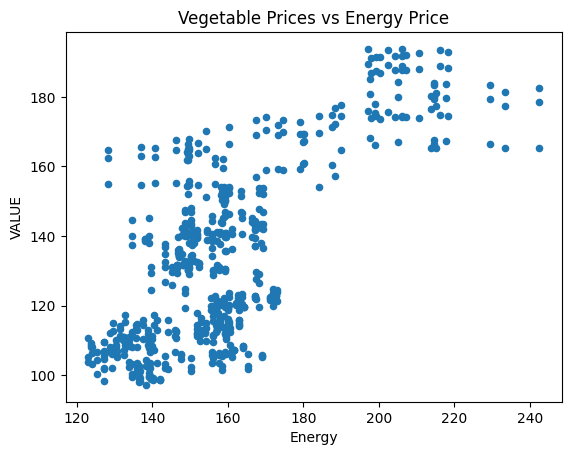

In [44]:
# Do a regression between the value of vegetables and energy / food prices.
vege_df.plot(x="Energy", y="VALUE", kind="scatter", title="Vegetable Prices vs Energy Price")
regression = linregress(vege_df["Energy"], vege_df["VALUE"])
print(f"Regression: y = {regression.slope}x + {regression.intercept}")